# Primeri uporabe simbolnega računa za izračun prehodnega pojava RLC vezja 



Rešujemo enačbo

$0=\frac{\text{d}i}{\text{d}t}R+\frac{1}{C}i+L\frac{{{\text{d}}^{\text{2}}}i}{\text{d}{{t}^{2}}}$

Priprava potrebnih knjižnic:

In [1]:
import numpy as np
from sympy import *
from IPython.display import *
import matplotlib.pyplot as plt
%matplotlib inline 
init_printing(use_latex=True)
#import warnings
#warnings.filterwarnings('ignore')

Priprava simbolnih spremenljivk, zapis differencialne enačbe in reševanje z uporabo funkcije $dsolve$.

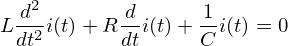

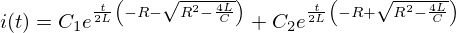

In [26]:
var('R C L t C1 C2 a Ug i0') # priprava spremenljivk
i = Function("i")(t) # funkcija toka
de = Eq(i/C+R*i.diff(t)+L*i.diff(t,2)) # zapis diferencialne enačbe
display(de) # izpis enačbe
des = dsolve(de,i) # rešitev enačbe
display(des) # izpis rešitve


Rešitev vsebuje konstanti $C_1$ in $C_2$, ki ju moramo izraziti z začetnimi pogoji. 
Konstanto $C_1$ bomo zamenjali z začetnim pogojem za tok, t.j. $i(t=0)=0$.

To naredimo tako, da izrazimo enačbo za čas $t=0$ in jo rešimo za $C_1$.

In [27]:
t0=des.args[1].subs({'t':0})
eq_init = Eq(i0, t0)  # izrazimo enačbo pri t=0
display(eq_init)  # prikažemo i0

init1_solve=solve(eq_init, C1) # rešimo enačbo za C1

display(init1_solve)  # prikažemo rešitev

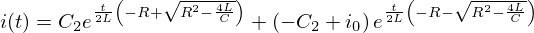

In [28]:
C1_solve = des.subs(C1, init1_solve[0]) # v rešitev vstavimo C1 in dobimo
C1_solve

In [29]:
expand(C1_solve)  # drugačen izpis

Vstavimo začetni pogoj $i(t=0)=i_0=0$ in za krajši zapis nadomestimo $R_1=\sqrt {R^2-\frac{4 l}{C}}$.

In [30]:
zacetni_pogoji = {'i0': 0}
i2=C1_solve.subs(zacetni_pogoji)
R_1=symbols('R_1')
i2b=i2.subs(sqrt(R**2-4*L/C),R_1)
display(i2b)

Poiščemo še rešitev za $C_2$ iz odvoda toka. Ker je odvod toka krat induktivnost enaka napetosti na tuljavi $u_L=L \frac{di}{dt}$, je torej potrebno pogledati, kolikšna je ta napetost ob preklopu. Ker se napetost na kondenzatorju ob preklopu ne more spremeniti, bo ta ob preklopu enaka nič, prav tako bo ob preklopu enaka nič tudi napetost na uporu, saj je tok ob preklopu enak nič. Torej bo vsa napetost ob preklopu na tuljavi in bo kar enaka napetosti vira $u_L(t=0)=U_g$. Iz tega sledi, da bo $u_L(t=0)=L \frac{di(t=0)}{dt}=U_g$ oziroma $\frac{di(t=0)}{dt}=U_g/L$.

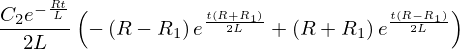

In [31]:
C2=symbols('C2')
C2_solve=i2b.rhs.diff(t) # izračunamo odvod
simplify(C2_solve) # izpišemo odvod

Zgornja enačba izraža odvod toka po času. Sedaj jo izrazimo ob času $t=0$ in $C_2$ izrazimo z odvodom pri t=0.

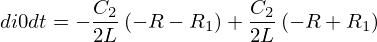

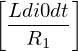

In [32]:
di0dt=symbols('di0dt')
t0=C2_solve.subs({'t':0})
eq_init2 = Eq(di0dt, t0)  # izrazimo enačbo pri t=0
display(eq_init2)  # prikažemo di/dt(t=0)

init2_solve=solve(eq_init2, C2) # rešimo enačbo za C2

display(simplify(init2_solve))  # prikažemo rešitev C2=

Končno obliko zapisa enačbe za $i(t)$ dobimo z nadomestitvijo konstante $C_2$ z odvodom toka  $\frac{di(t=0)}{dt}$, tega pa z  $U_g/L$.

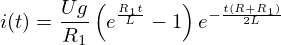

In [52]:
C3_solve = i2b.subs(C2, init2_solve[0]) # v rešitev vstavimo C2 in dobimo
C3_solve
i3=C3_solve.subs(di0dt,Ug/L) # Zamenjamo di/dt(0) z Ug/L
simplify(i3)

Komentar o končni enačbi.
Zapis rešitve je nekoliko drugačen, kot smo ga "navajeni". Zato ga malo predelajmo ob upoštevanju, da je $R_1$ lahko kompleksno število. 
Najprej zapišemo $i(t)=\frac{U_g}{R_1}\left( e^\frac{R_1 t }{L} e^{-\frac{R_1 t }{2L}}-e^{-\frac{R_1 t }{2L}} \right)e^{-\frac{R t }{2L}} $. In potem $i(t)=\frac{U_g}{R_1}\left(  e^{\frac{R_1 t }{2L}}-e^{-\frac{R_1 t }{2L}} \right)e^{-\frac{R t }{2L}} $

Sedaj se spomnimo, da je $R_1=\sqrt{R^2-4 L/C}$. Ločimo dva primera:
1. Če je $R>\sqrt{\frac{4L}{C}}$, bo $R_1$ pozitiven, in  drugi člen v oklepaju bo hitro izzvenel, rešitev pa bo oblike 
$i(t)=\frac{U_g}{R_1}\left(  e^{\frac{R_1 t }{2L}} \right)e^{-\frac{R t }{2L}} = \frac{U_g}{R_1}e^{-\frac{(R-R_1) t }{2L}}$. Ker je $R>R_1$, bo tok pri teh pogojih eksponento izzvenel.
2. Če pa je $R<\sqrt{\frac{4L}{C}}$, bo $R_1$ imaginaren, torej recimo enak $R_1=j R_2$. Če zamenjamo $R_1$ v enačbi, dobimo
$i(t)=\frac{U_g}{j R_2}\left( e^\frac{j R_2 t }{ 2L} -e^{-\frac{j R_2 t }{2L}} \right)e^{-\frac{R t }{2L}} $. Sedaj preprosto upoštevamo Eulerjevo enačbo $sin(x)=\frac{e^{jx}-e^{-jx}}{2j}$ in dobimo $i(t)=\frac{U_g}{2 R_2} sin(\frac{R_2  }{2L} t)e^{-\frac{R }{2L}t} $. Gre za rešitev, ki nakazuje sinusno nihanje toka, ki se eksponentno zmanjšuje proti 0.

In [51]:
podatki = {C:0.2, L: 1, R: 2, Ug: 10}
R1=sqrt(R**2-4*L/C)
podatki["R_1"]= R1subs
R1subs=R1.subs(podatki)
i4=i3.subs(podatki)
simplify(i4)

### Priprava za izračune in izris

Pripravimo podatke za izračune in izris. Za to uporabimo funkcijo $lambdify$, ki pretvori zapis enačbe iz simbolnega zapisa v funkcijo za numerične izračune. <a name='pripravi za izračune' />

In [61]:
podatki = {C:0.1, L: 10, R: 2, Ug: 10}  # podam podatke v obliki "slovarja" (Dictionary), https://www.w3schools.com/python/python_dictionaries.asp
#podatki = {C:1e-5, L: 5e-3, R: 5, Ug: 2}  # podam podatke v obliki "slovarja" (Dictionary), https://www.w3schools.com/python/python_dictionaries.asp
R1=sqrt(R**2-4*L/C)
Rcrit=(sqrt(4*L/C))
print(Rcrit.subs(podatki))
print(R1)
R1subs=R1.subs(podatki)  # Izračunam R1 za podatke
print(R1subs) # Izpišem vrednost R1. Če je imaginarna, bo prišlo do nihanja
podatki["R_1"]= R1subs  # Dodam izračunano vrednost R1 v slovar
print(podatki) # Izpiše slovar

tok = lambdify(t, i3.args[1].subs(podatki), 'numpy') # tok kot funkcija časa

print('Tok pri 0s: {:g} A'.format(tok(1e-3)))


6.32455532033676*sqrt(10)
sqrt(R**2 - 4*L/C)
19.8997487421324*I
{C: 0.1, L: 10, R: 2, Ug: 10, 'R_1': 19.8997487421324*I}
Tok pri 0s: 0.0009999+0j A


Sledi izris rezultatov.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


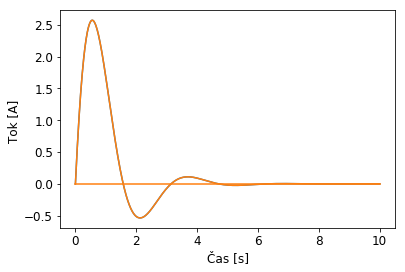

In [46]:
cas = np.linspace(0, 10, 1000) # spremeni po potrebi za drugačen izris
def slika():
    plt.plot(cas, (tok(cas)), 'C0')
    ianalit=5*np.exp(-cas)*np.sin(2*cas)
    plt.plot(cas, ianalit, 'C1')
    plt.plot(cas, np.imag(tok(cas)), 'C1')
    plt.xlabel('Čas [s]')
    plt.ylabel('Tok [A] ')
    plt.show()
slika()

In [ ]:
ianalit=A*np.sin(2t)

### Opravi naslednje analize:
1. Spreminjaj upornost upora in opazuj spremembe.
2. Spreminjaj kapacitivnost kondenzatorja in opazuj spremembe.
3. Spreminjaj induktivnost tuljave in opazuj spremembe.


### Kratka razlaga
Opazovali smo odziv zaporedne vezave RLC vezja na priklop na enosmerni napetosti vir. 
Pred priklopom na vezje v vezju ni bilo toka, po izteku prehodnega pojava pa tudi ne, saj kondenzator "blokira" prehod toka. 
Na njem je po koncu prehodnega pojava celotna napetost vira. Odziv vezja je lahko precej različen, odvisen je od vrednosti elementov R, L in C. Iz rezultata je očitno, da bo imel ključno vlogo za obliko odziva člen $R_1=\sqrt{R^2-4 L/C}$. 

Če bo $R^2 > 4 L/C$, bo ta člen pozitiven in odziv bo eksponentna rast in upad toka. Taki obliki rečemo (nadkritično) dušena, saj ni nobenega prenihanja. Večja kot bo upornost, večje bo dušenje in manjša bo največja vrednost toka med prehodnim pojavom.

Če pa bo $R^2 < 4 L/C$, bo člen $R_1$ imaginaren, kar pomeni, da bo odziv vezja bolj ali manj dušeno nihanje. Teoretično bi za $R=0 \: \Omega $ dobili neskončno nihanje. V praksi seveda ne, saj imajo vsi elementi, vključno z virom, neko notranjo upornost, preko katere se energija električnega in magnetnega polja pretvori v toplotno.

Zanimiv je tudi odziv pri $R^2 = 4 L/C$.Temu odzivu rečemo kritično dušeno nihanje, saj se pri teh pogojih prehodni pojav  najhitreje zaključi.

* Enako obliko diferencialne enačbe lahko zasledimo pri mnogih fizikalnih pojavih, na primer pri nihanju mase na vzmeti s konstanto dušenja: https://sl.wikipedia.org/wiki/Nihanje 

* Običajno se za analizo odziva obravnavane diferencialne enačbe le to nekoliko predela. Običajno tako, da se jo deli z $L$ in iz $\frac{{{\text{d}}^{\text{2}}}i}{\text{d}{{t}^{2}}}+\frac{\text{d}i}{\text{d}t}R/L+\frac{1}{C L}i=0$ zapiše obliko
$\frac{{{\text{d}}^{\text{2}}}i}{\text{d}{{t}^{2}}}+2 \alpha \frac{\text{d}i}{\text{d}t}+\omega _0^2 i=0$, kjer je očitno $\alpha = \frac{R}{2L}$ in $\omega _0 = \frac{1}{\sqrt {C L}}$. $\omega_0$ je očitno krožna resonančna frekvenca, $\alpha$ pa je faktor dušenja oz. atenuacije. Za več, si poglej na primer https://en.wikipedia.org/wiki/RLC_circuit 



### Dodatni izračuni - napetosti na elementih vezja
Ko imamo rešitev za tok, lahko enostavno dobimo še zapise za napetosti na elementih vezja. 

Napetost na uporu je kar $u_R(t) = R i(t)$, napetost na tuljavi $u_L(t) = L \frac{di}{dt}$ in na kondenzatorju $u_C(t) = 1 / C \int {i dt}$. 

Ob integraciji je potrebno upoštevati še dodatno konstanto, ki jo je potrebno določiti iz začetnih pogojev. V konkretnem primeru bi morali določiti konstanto iz pogoja, da mora biti $u_C(t=0) = 0$. Temu dodatnemu delu se lahko izognemo tako, da namesto z integracijo toka  napetost na kondenzatorju določimo iz zveze $u_C(t) = Ug - u_L(t) - u_R(t)$.

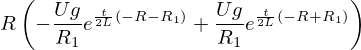

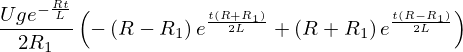

In [12]:
u_R=R*i3.rhs
display(u_R)
uR = lambdify(t, u_R.subs(podatki), 'numpy') # napetost na uporu
u_L=L*i3.rhs.diff(t)
display(simplify(u_L))
uL = lambdify(t, u_L.subs(podatki), 'numpy') # napetost na tuljavi
#print(uL(0))
# u_C=i3.rhs.integrate(t)/C
#display(u_C)
#uC = lambdify(t, u_C.subs(podatki), 'numpy') # tok kot funkcija časa
u_C=Ug-u_L-u_R
#display(simplify(u_C))
uC = lambdify(t, u_C.subs(podatki), 'numpy') # napetost na kondenzatorju

uRLC=lambdify(t, u_C.subs(podatki)+ u_R.subs(podatki)+ u_L.subs(podatki), 'numpy') # vsota vseh napetosti

Za spremembo parametrov je potrebno spremeniti podatke v <a href=#bookmark>pripravi za izračune</a>. V grafu je izrisana tudi vsota treh napetosti, ki mora biti enaka napetosti vira $Ug$. Pozor: teh napetosti ne moremo v kodi preprosto sešteti kot uR+uL+uC, ker so t.i. lambda funkcije, zato jih je potrebno sešteti znotraj $lambdify$ funkcije, kar je narejeno v zgornji celici.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


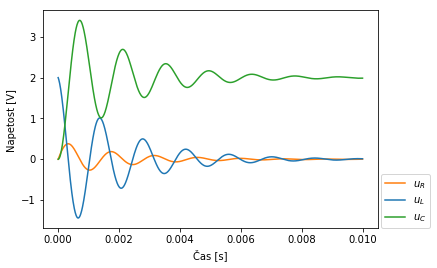

In [13]:
cas = np.linspace(0, 1e-2, 1000)

def slika():
    #plt.plot(cas, tok(cas), 'C0', label='Tok [A]')
    plt.plot(cas, (uR(cas)), 'C1', label='$u_R $')
    plt.plot(cas, (uL(cas)), 'C0', label='$u_L $')
    plt.plot(cas, (uC(cas)), 'C2', label='$u_C $')
    #plt.plot(cas, (uRLC(cas)), '--', label='$u_R + u_L + u_C $') # iz neznanih razlogov včasih nagaja
    plt.xlabel('Čas [s]')
    plt.ylabel('Napetost [V] ')
    plt.legend(loc=(1.01, 0));
    plt.show()
slika()

***
## <font color='blue'>Numeričen izračun diferencialne enačbe</font>

Sedaj rešimo isto diferencialno enačbo s pomočjo numeričnih metod. Uporabili bomo funkcijo $odeint$, ki sama določi najbolj primerno metodo, pri čemer pa je potrebno diferencialno enačbo višjega reda "predelati" v sistem dveh ali več enačb nižjega reda. V našem primeru za $\frac{di}{dt}=i^{'} $ izberemo novo funkcijo, npr. $z=i^{'}$. Potem je $i^{''}=z^{'}$ in diferencalna enačba $L\frac{{{\text{d}}^{\text{2}}}i}{\text{d}{{t}^{2}}} +  R\frac{\text{d}i}{\text{d}t} + \frac{1}{C}i = 0$ postane oblike $L z^{'} + R z + \frac{i}{C} = 0$.To zapišemo v obliki $z^{'} =- \frac{R}{L} z - \frac{i}{L C} $.

Začetni pogoji so enaki kot v prejšnjem primeru, s tem, da je sedaj $z(0)=i(0)^{'}=Ug/L$.

Po https://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ODE_Example.html


In [14]:
podatki = {C:1e-5, L: 5e-3, R: 4, Ug: 2}
R=4
L=5e-3
C=1e-5
Ug=2
from scipy.integrate import odeint
def dI_dt(I, t):
    # Here I is a vector such that i=I[0] and z=i'=I[1]. This function should return [i', z']
    return [I[1], -R/L*I[1] - I[0]/(L*C) ]
I0 = [0,Ug/L]
ts = np.linspace(0, 1e-2, 500)
Is = odeint(dI_dt, I0, ts)
Ist = Is[:,0]

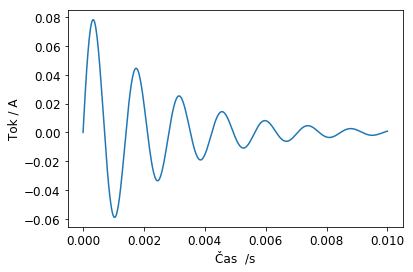

In [15]:
plt.rcParams.update({'font.size': 12})  # increase the font size
plt.xlabel("Čas  /s")
plt.ylabel("Tok / A")
plt.plot(ts, Ist);

Rešujemo enačbo ${{u}_{g}}=RC\frac{\text{d}{{u}_{C}}}{\text{d}t}+{{u}_{C}}$, 
kjer je ${{u}_{g}}(t)={{U}_{g}}\sin {(\omega t})$.

Ali sta rešitvi enaki? Lahko ju med seboj primerjamo. 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


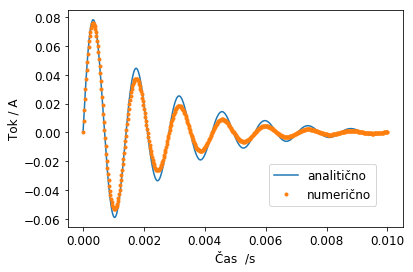

In [16]:
plt.xlabel("Čas  /s")
plt.ylabel("Tok / A")
plt.plot(ts, Ist,label='analitično');
plt.plot(ts,tok(ts),'.',label='numerično')
plt.legend(loc=(0.6, 0.1));

Ugotovimo, da se krivulji lepo prilegata, torej tako analitični kot numerični izračun da praktično enak rezultat. 

V principu smo za numeričen izračun uporabili le malo kode, torej je navidezno bistveno lažje uporabiti numeričen postopek. To sicer drži, a le do neke mere. Analitična rešitev nam da dodaten uvid v pričakovan odziv, če ga le znamo razbrati. Na primer, pri analitičnem izrazu smo ugotovili, da ima ključno vlogo pri obliki odziva člen $R_1=\sqrt{R^2-4 L/C}$ iz katerega razberemo vzročnost spreminjanja parametrov $R, L, C$.Tega pri numerični rešitvi ni mogoče razbrati oziroma se moramo zelo potruditi, da z mnogo ponovitvami ugotavljamo vpliv posameznih parametrov na odziv.

Torej je bolje uporabiti numeričen izračun? Že že, vendar pogosto to ni mogoče. Analitična rešitev difeencialnih enačb je omejena na določene primere. Če se kapacitivnost, induktivnost ali upornost s časom spreminja, ali pa če je vzbujanje bolj "zapleteno", analitičen izračun odpade in tudi če obstaja, je lahko precej nepregleden. V tem primeru je numeričen postopek boljša rešitev. Za primer si oglejmo odziv RLC vezja na pravokoten izmenični signal.

***
***
## Odziv RLC vezja na pravokoten izmenični signal

Najprej kreiramo in izrišemo signal. Za časoven niz vzamemo kar prejšnje podatke, frekvenco signala določimo tako, da je znotraj časovnega niza več period.

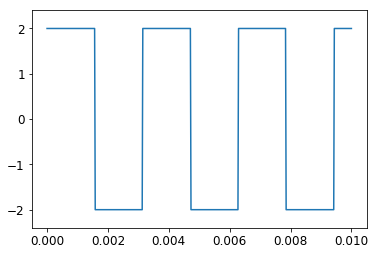

In [17]:
from scipy import signal

def Ug_t(t):  # vzbujalni signal kot funkcija. Nato rabim še Ugt - vzbujalni signal kot niz (glej spodaj)
    return Ug*signal.square(omega* t+fi) #+ Ug

omega=max(ts)*2e5
fi=0
plt.plot(ts,Ug_t(ts) )
plt.ylim(-1.2*Ug, 1.2*Ug)

Želimo uporabimo enak postopek kot v prejšnjem primeru, le  funkciji dI_dt bi dodali vzbujanje Ug_t.Tu nastopi problem, saj je potrebno diferencialno enačbo predelati. Pri zapisu dif enačbe smo izhajali iz ${{u}_{R}}+{{u}_{C}}+{{u}_{L}}={{u}_{g}}$, kjer je bilo vzbujanje enosmeren napetostni vir. Ob odvajanju smo dobili diferencialno enačbo drugega reda, odvod enosmernega napetostnega vira pa je bil enak nič. Sedaj pa je $u_g(t)$ funkcija časa. Zato ob odvajanju enačbe $L\frac{\text{d}i}{\text{d}t} + + iR + \frac{1}{C}\int{i}\text{d}t  ={{u}_{g}}$ dobimo $L\frac{{{\text{d}}^{\text{2}}}i}{\text{d}{{t}^{2}}} +  R\frac{\text{d}i}{\text{d}t} + \frac{1}{C}i = \frac{d u_g}{dt}$.

Tu pa nastopi težava, saj je odvod stopničaste funkcije problematičen. Teoretično je odvod neskončen, kar bi predstavljalo problem pri numeričnem reševanju enačbe. Ena od možnosti je, da predelamo vzbujalni signal tako, da ne bo tako "oster", torej, da bo prehajanje med enim in drugim stanjem bolj zvezno. Potem bo tudi odvod bolj gladka krivulja.

Ideja za generiranje takega signala je povzeta po http://hplgit.github.io/primer.html/doc/pub/funcif/._funcif-bootstrap004.html#sec:basic:exH1 

V spodnji celici izdelamo funkcijo H1 in njen odvod dH1, ki omogoča izdelavo zglajenega žagastega signala širine $width$, periode $w_{single}$.

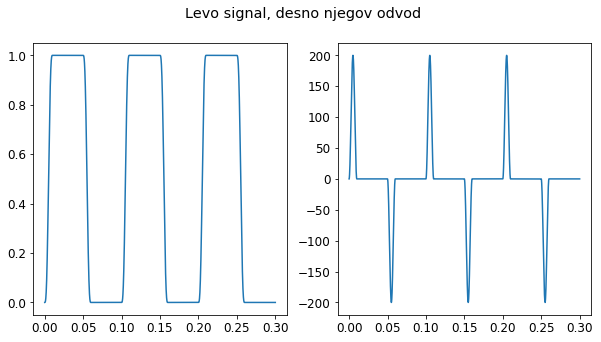

In [18]:
eps=0.005  # funkcija se zvezno spreminja od 0 do 1 znotraj območja 2*eps
astart=eps # zaćetek stopnice , najmanj eps
width=0.05 # širina stopnice
w_single=0.1 # dolžina ene periode
n_repeat=3

Numb_points=3000

def H1(a,w,x): 
    if x>w_single:
            x=x-np.fix(x/w_single)*w_single # Da se vrnem na izračun v prvi periodi
    if x<(-eps+a): return 0
    elif x>(-eps+a) and x<(eps+a): return (1/2+(x-a)/(2*eps)+np.sin(np.pi*(x-a)/eps)/(2*np.pi))
    elif x>(eps+a) and x<(-eps+a+w): return 1    
    elif x>(-eps+a+w) and x<(eps+a+w): return 1-(1/2+(x-a-w)/(2*eps)+np.sin(np.pi*(x-a-w)/eps)/(2*np.pi))
    else: return 0

def dH1(a,w,x):  
    if x>w_single:
            x=x-np.fix(x/w_single)*w_single
    if x<(-eps+a): return 0
    elif x>(-eps+a) and x<(eps+a): return (1/(2*eps)+np.cos(np.pi*(x-a)/eps)/(2*eps))
    elif x>(eps+a) and x<(-eps+a+w): return 0    
    elif x>(-eps+a+w) and x<(eps+a+w): return -(1/(2*eps)+np.cos(np.pi*(x-a-w)/eps)/(2*eps))
    else: return 0

    
cas=np.linspace(0,w_single*n_repeat,Numb_points)

y=np.zeros(Numb_points)
dy=np.zeros(Numb_points)

for i in range(len(cas)):
    y[i]=H1(astart,width,cas[i])
    dy[i]=dH1(astart,width,cas[i])                                                 
    

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle('Levo signal, desno njegov odvod')
ax1.plot(cas, y)
ax2.plot(cas, dy)



V diferencialni enačbi moramo uporabiti odvod funkcije, torej dH1.

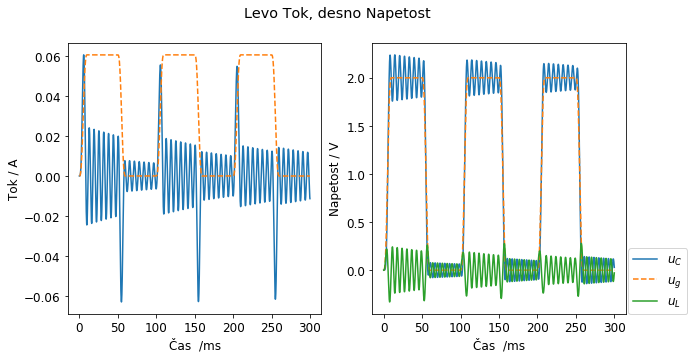

In [19]:
R=1e-1
L=10e-3
C=1e-4
Ug=2
from scipy.integrate import odeint
def dI2_dt(I, t):
    # Here I is a vector such that i=I[0] and z=i'=I[1]. This function should return [i', z']
    return [I[1], -R/L*I[1] - I[0]/(L*C) + Ug/L*dH1(astart,width,t) ]
I0 = [0,1e-4]  # Potreben en mali odvod na začetku ?!, sicer da 0
ts = cas
Is2 = odeint(dI2_dt, I0, ts)
Ist2 = Is2[:,0]  # tok
dIst2=Is2[:,1]  # odvod toka

uL2=L*dIst2 # napetost na tuljavi
uR2=R*Ist2 # na uporu
uC2=Ug*y-(uL2+uR2)  # na kondenzatorju

maxIst2=np.max(Ist2)


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
fig.suptitle('Levo Tok, desno Napetost')
ax1.plot(cas*1e3, Ist2);
ax1.plot(cas*1e3,y*maxIst2,'--') # vzbujalni signal, normiran na max vrendost toka - za primerjavo
ax1.set_xlabel("Čas  /ms")
ax1.set_ylabel("Tok / A")

ax2.plot(cas*1e3, uC2,label='$u_C$') # zamenjaj z uR ali uC ali uL ali kombinacijo le teh
ax2.plot(cas*1e3, Ug*y,'--',label='$u_g$')
ax2.plot(cas*1e3, uL2,label='$u_L$') # zamenjaj z uR ali uC ali uL ali kombinacijo le teh


plt.legend(loc=(1.01, 0))
ax2.set_xlabel("Čas  /ms")
ax2.set_ylabel("Napetost / V")

In [20]:
sqrt(L*C)*(2*np.pi)

### Primerjava:
Za primerjavo oziroma oceno pravilnosti izračuna lahko generiramo samo en stopničast signal. (Npr. tako, da bo width=w_single.) Ta odziv lahko primerjamo z odzivom na vklop na enosmerni vir, ki smo ga že določili - tako analitično kot numerično. Vidimo, da je največja vrednost, ki jo doseže tok nekoliko odvisna od strmine pravokotnega signala, ki jo  določimo s parametrom eps. Manjši, kot je ta parameter, bolj strma je stopnica in bolj se oblika signala približuje pravokotni.



### Opazovanje odziva pri različnih parametrih
Proučevanje odziva vezja npr. pri vklopu vira s stopničastim (pravokotnim periodičnim) signalom je lahko precej težavno, še posebno, če se signal med periodo ne uspe iznihati. Zato je morda smiselno začeti analizo z enim samim pravokotnim signalom (npr. eps=0.001, width=0.005 # širina stopnice, w_single=0.01 # dolžina ene periode,n_repeat=1) in izbrati vrednosti elementov tako, da je vezje blizu kritično dušeno. Na grafu se izriše z oranžno tudi vzbujalni signal, ki je za primerjavo z odzivom normiran na maksimalno vrednost toka.

#### UPOR
* Začnemo npr. z  R=40, L=5e-3 in C=1e-5. Ugotovimo, da ob vklopu vira tok hipoma naraste in dušeno pade na 0 A, ob izklopu napetosti vira (Ug(t)=0 V) pa ima tok enako, samo obrnjeno obliko. Je to ok? Da, ob vklopu se kondenzator napolni in nato prepreči prehod toka zaradi nastopa enosmernih razmer, ob padcu napetosti vira na 0 V (tokokrog je še vedno sklenjen!), pa se ta kondenzator prazni in tok teče v obratno smer. Lahko še odkomentiramo vrstice, ki izrišejo graf napetosti in ugotovimo, da smo dejansko z nastavljenimi pogoji dosegli polno "nabitje" kondenzatorja. Napetost na kondenzatorju se izenači z napetostjo generatorja (samo nasprotne smeri je, saj mora biti vsota vseh napetosti v zanki enaka 0). Prav tako ima po koncu vzbujanja kondenzator dovolj časa, da se razelektri na napetost 0 V. 
* Zmanjšajmo vrednost upora na npr. 20 $\Omega$. Ugotovimo, da je potek podoben kot v prejšnjem primeru, le vmes pride še do prenihaja toka. To hkrati pomeni prenihaj napetosti na kondenzatorju preko napetosti generatorja. Kako je to mogoče? Opazimo lahko, da je hkrati napetost na tuljavi ob tem času negativna. Napetost na tuljavi je namreč sorazmerna odvodu toka, ta pa (glej sliko na levi) bo negativen ob zmanjševanju toka.  
* Zmanjšajmo upornost na 5 $\Omega$. Sedaj je nihanje toka ob vklopu izrazito in ne zamre niti ob izklopu vira na 0 V. To se odraža tudi v prenihajih napetosti na kondenzatorju.
* Zmanjšajmo upornost na 1 $\Omega$. Že skoraj ne razpoznamo, da gre za odziv na pravokoten signal.
* Povečamo število period na 2, 3 ali 4 (n_repeat): še večja zmeda.
* Pri npr. 4 periodah nazaj povečajmo upornost, npr. na 100 $\Omega$. Zopet razpoznamo vzorec.

#### KONDENZATOR
* Začnimo znova, z enim samim pravokotnim signalom (n_repeat=1)in upornostjo npr. 100 $\Omega$. In povečajmo kapacitivnost. Na primer za 5x, na 5e-5 F. Ugotovimo, da se tok mnogo počasneje vrača proti nič. Zakaj? No, kondenzator je sedaj "večji", torej pri isti napetosti lahko shrani več naboja (Q=CU). Naboj pa je integral toka, torej mora steči v kondenzator več toka, kot v prejšnjem primeru, da bo tudi napetost enaka. Očitno se kondenzator v času periode ne uspe polno naelektriti.
* Povečajmo število period na 2 ali 3. Ugotovimo, da tok ne doseže več enake velike vrednosti kot v prvi periodi. Zakaj? Ob izklopu vira na 0 V se začne kondenzator prazniti ( s tokom v obratno smer), vendar se ne uspe znotraj periode popolnoma izprazniti. Na njem ostane določena napetost. Ob prvem polnenju se kondenzator ni uspel  polno naelektriti znotraj ene periode (na napetost Ug), se je pa bolj napolnil v drugi oz. naslednjih periodah, saj je štartal že z določeno napetostjo (nabojem).
* Če pogledamo napetosti (odkomentiramo plot ax2) ugotovimo, da v teh razmerah tuljava igra zelo malo vlogo. Napetost na njej je majhna in še ta se pojavi le ob spremembi stanja vira.

#### TULJAVA
* Zopet začnimo od začetka. Vir naj ima le eno periodo, L=5e-3, C=1e-5, R=40.Vpliv tuljave je v teh razmerah zelo majhen, napetost na njej je zelo majhna.
* Povečajmo induktivnost na L=1e-2 (10 mH). Sedaj že opazimo večjo napetost na tuljavi, še vedno pa prevladuje napetost na kondenzatorju.
* Pri 100 mH je vpliv tuljave še večji, napetost na kondenzatorju pa ne sledi več obliki vzbujalne napetosti. Doseže pa večjo vrednost, tedaj, ko je napetost na tuljavi negativna. 
* Mnogo večje induktivnosti niso običajne, lahko pa teoretično pogledamo, kaj se zgodi, če je npr. L=500 mH. Tedaj ob začetku naraščanja napetostnega signala napetost na tuljavi sledi v popolnosti napetostnemu signalu - se upira spremembi. Po koncu spremembe, ko se napetost vira ustali, napetost na tuljavi pada, hkrati narašča napetost na kondenzatorju. 
